In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


# Grafico de Lineas

## Análisis Temporal de Hospitalizados por COVID en Chile

Este notebook tiene como objetivo analizar y visualizar la evolución del número de pacientes hospitalizados por COVID-19 en Chile a lo largo del tiempo. Utilizaremos un conjunto de datos que recoge el número total de camas UCI ocupadas diariamente para llevar a cabo nuestro análisis.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/udd/cursos/visualizacion/clases_practicas/data/HospitalizadosUCI_Acumulado.csv', sep=',')
df

,Grupo de edad,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-05-02,2020-05-04,2020-05-06,2020-05-08
0,< 1 años,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 4 años,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5 14 años,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15 44 años,124.0,143.0,164.0,183.0,187.0,190.0,193.0,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,45 64 años,179.0,196.0,234.0,270.0,284.0,290.0,292.0,292.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,65 y más años,144.0,156.0,162.0,187.0,196.0,197.0,200.0,216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,00 5 años,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,5.0,5.0,6.0,7.0,7.0,9.0,11.0,11.0,11.0
7,5 17 años,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,5.0
8,18 49 años,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253.0,260.0,261.0,264.0,264.0,264.0,269.0,339.0,344.0,357.0,402.0
9,50 59 años,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,172.0,173.0,175.0,179.0,180.0,182.0,229.0,238.0,245.0,269.0


In [4]:
df = df.fillna(0)
df

,Grupo de edad,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-05-02,2020-05-04,2020-05-06,2020-05-08
0,< 1 años,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1 4 años,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5 14 años,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15 44 años,124.0,143.0,164.0,183.0,187.0,190.0,193.0,196.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45 64 años,179.0,196.0,234.0,270.0,284.0,290.0,292.0,292.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,65 y más años,144.0,156.0,162.0,187.0,196.0,197.0,200.0,216.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,00 5 años,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,5.0,5.0,6.0,7.0,7.0,9.0,11.0,11.0,11.0
7,5 17 años,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,5.0
8,18 49 años,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,253.0,260.0,261.0,264.0,264.0,264.0,269.0,339.0,344.0,357.0,402.0
9,50 59 años,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168.0,172.0,173.0,175.0,179.0,180.0,182.0,229.0,238.0,245.0,269.0


In [5]:
df = df.transpose()
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
Grupo de edad,< 1 años,1 4 años,5 14 años,15 44 años,45 64 años,65 y más años,00 5 años,5 17 años,18 49 años,50 59 años,60 69 años,70 79 años,80 y más años
2020-04-13,0.0,0.0,2.0,124.0,179.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-14,0.0,0.0,2.0,143.0,196.0,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-15,0.0,0.0,2.0,164.0,234.0,162.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-16,1.0,0.0,2.0,183.0,270.0,187.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-17,2.0,0.0,2.0,187.0,284.0,196.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-18,2.0,0.0,2.0,190.0,290.0,197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-19,2.0,0.0,2.0,193.0,292.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-20,2.0,0.0,2.0,196.0,292.0,216.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-22,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,253.0,168.0,159.0,114.0,36.0


In [6]:
# Usar la primera fila como nombres de columnas
df.columns = df.iloc[0]
df


Grupo de edad,< 1 años,1 4 años,5 14 años,15 44 años,45 64 años,65 y más años,00 5 años,5 17 años,18 49 años,50 59 años,60 69 años,70 79 años,80 y más años
Grupo de edad,< 1 años,1 4 años,5 14 años,15 44 años,45 64 años,65 y más años,00 5 años,5 17 años,18 49 años,50 59 años,60 69 años,70 79 años,80 y más años
2020-04-13,0.0,0.0,2.0,124.0,179.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-14,0.0,0.0,2.0,143.0,196.0,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-15,0.0,0.0,2.0,164.0,234.0,162.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-16,1.0,0.0,2.0,183.0,270.0,187.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-17,2.0,0.0,2.0,187.0,284.0,196.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-18,2.0,0.0,2.0,190.0,290.0,197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-19,2.0,0.0,2.0,193.0,292.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-20,2.0,0.0,2.0,196.0,292.0,216.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-22,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,253.0,168.0,159.0,114.0,36.0


In [7]:
# Eliminar la primera fila del DataFrame transpuesto
df = df.drop(df.index[0])

In [8]:
df

Grupo de edad,< 1 años,1 4 años,5 14 años,15 44 años,45 64 años,65 y más años,00 5 años,5 17 años,18 49 años,50 59 años,60 69 años,70 79 años,80 y más años
2020-04-13,0.0,0.0,2.0,124.0,179.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-14,0.0,0.0,2.0,143.0,196.0,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-15,0.0,0.0,2.0,164.0,234.0,162.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-16,1.0,0.0,2.0,183.0,270.0,187.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-17,2.0,0.0,2.0,187.0,284.0,196.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-18,2.0,0.0,2.0,190.0,290.0,197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-19,2.0,0.0,2.0,193.0,292.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-20,2.0,0.0,2.0,196.0,292.0,216.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-22,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,253.0,168.0,159.0,114.0,36.0
2020-04-23,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,260.0,172.0,161.0,114.0,40.0


In [9]:
# Convertir el índice a datetime
df.index = pd.to_datetime(df.index)
df

Grupo de edad,< 1 años,1 4 años,5 14 años,15 44 años,45 64 años,65 y más años,00 5 años,5 17 años,18 49 años,50 59 años,60 69 años,70 79 años,80 y más años
2020-04-13,0.0,0.0,2.0,124.0,179.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-14,0.0,0.0,2.0,143.0,196.0,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-15,0.0,0.0,2.0,164.0,234.0,162.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-16,1.0,0.0,2.0,183.0,270.0,187.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-17,2.0,0.0,2.0,187.0,284.0,196.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-18,2.0,0.0,2.0,190.0,290.0,197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-19,2.0,0.0,2.0,193.0,292.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-20,2.0,0.0,2.0,196.0,292.0,216.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-22,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,253.0,168.0,159.0,114.0,36.0
2020-04-23,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,260.0,172.0,161.0,114.0,40.0


In [10]:
# Sumar todas las columnas y crear una nueva columna 'Camas UCI Totales'
df['Hospitalizados Totales'] = df.sum(axis=1)

In [11]:
# Seleccionar solo la columna 'Camas UCI Totales'
df_total = df[['Hospitalizados Totales']].astype(float)
df_total

Grupo de edad,Hospitalizados Totales
2020-04-13,449.0
2020-04-14,497.0
2020-04-15,562.0
2020-04-16,643.0
2020-04-17,671.0
2020-04-18,681.0
2020-04-19,689.0
2020-04-20,708.0
2020-04-22,735.0
2020-04-23,753.0


In [12]:
df_total.reset_index(inplace=True)
df_total

Grupo de edad,index,Hospitalizados Totales
0,2020-04-13,449.0
1,2020-04-14,497.0
2,2020-04-15,562.0
3,2020-04-16,643.0
4,2020-04-17,671.0
5,2020-04-18,681.0
6,2020-04-19,689.0
7,2020-04-20,708.0
8,2020-04-22,735.0
9,2020-04-23,753.0


In [13]:
df_total=df_total.rename(columns={'index': 'Fecha'})
df_total

Grupo de edad,Fecha,Hospitalizados Totales
0,2020-04-13,449.0
1,2020-04-14,497.0
2,2020-04-15,562.0
3,2020-04-16,643.0
4,2020-04-17,671.0
5,2020-04-18,681.0
6,2020-04-19,689.0
7,2020-04-20,708.0
8,2020-04-22,735.0
9,2020-04-23,753.0


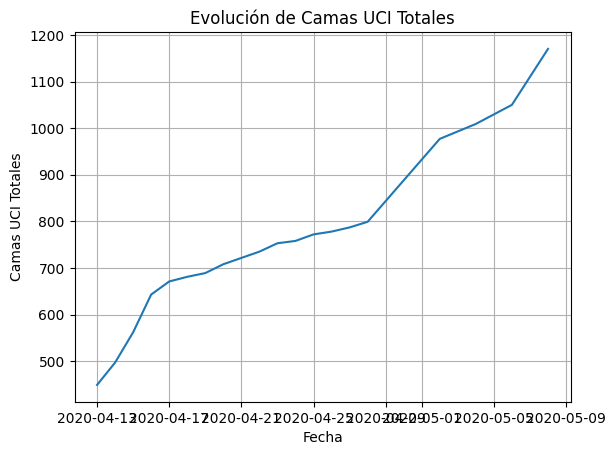

In [14]:
# Graficar la columna 'Camas UCI Totales'
plt.plot(df_total.Fecha, df_total['Hospitalizados Totales'])
plt.xlabel('Fecha')
plt.ylabel('Camas UCI Totales')
plt.title('Evolución de Camas UCI Totales')
plt.grid(True)
plt.show()

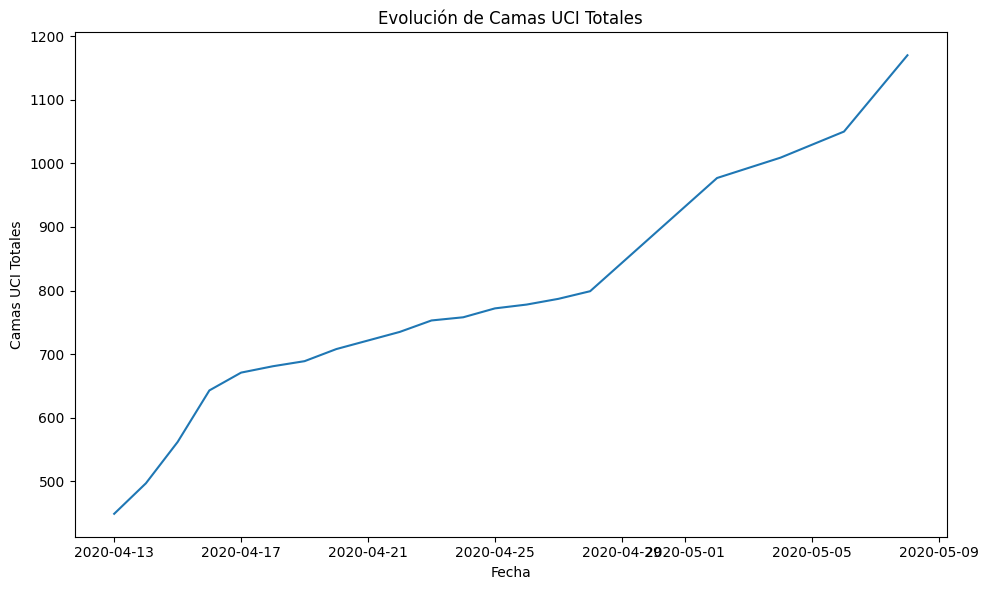

In [15]:
import matplotlib.dates as mdates
# Graficar la columna 'Camas UCI Totales'
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_total.Fecha, df_total['Hospitalizados Totales'])

plt.xlabel('Fecha')
plt.ylabel('Camas UCI Totales')
plt.title('Evolución de Camas UCI Totales')
plt.tight_layout()  # Ajustar la disposición para que todo encaje sin solaparse
plt.show()

# Gráfico de Area

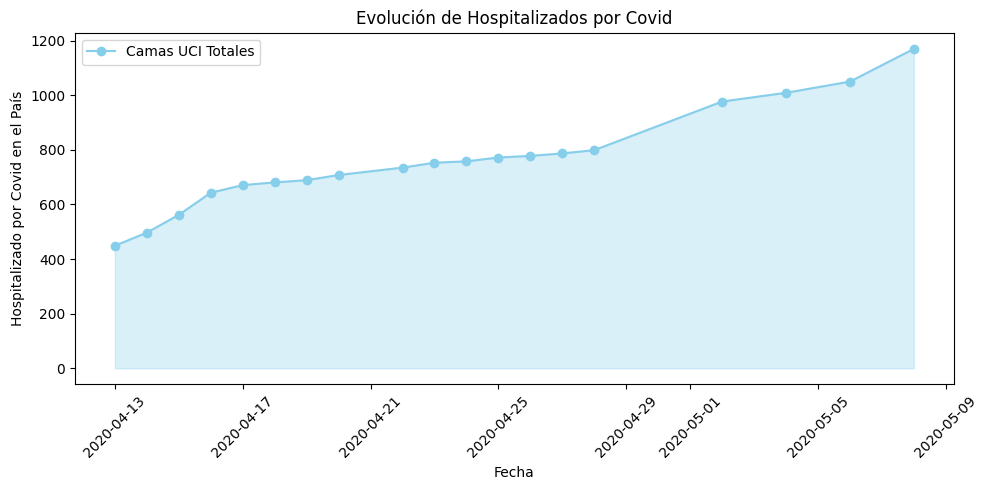

In [16]:
# Dibujamos el gráfico de líneas
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_total.Fecha, df_total['Hospitalizados Totales'], marker='o', linestyle='-', color='skyblue', label='Camas UCI Totales')



# Rellenamos el área bajo la curva
ax.fill_between(df_total.Fecha, df_total['Hospitalizados Totales'], color='skyblue', alpha=0.3)

# Etiquetas y título
plt.title('Evolución de Hospitalizados por Covid')
plt.xlabel('Fecha')
plt.ylabel('Hospitalizado por Covid en el País')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar la figura

# Mostramos el gráfico resultante
plt.show()


In [17]:
df_v=pd.read_csv('/content/drive/MyDrive/udd/cursos/visualizacion/clases_practicas/data/PacientesVMI.csv')
df_v

,Casos,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,...,2023-08-22,2023-08-23,2023-08-24,2023-08-25,2023-08-26,2023-08-27,2023-08-28,2023-08-29,2023-08-30,2023-08-31
0,Pacientes VMI,322.0,328.0,330.0,315.0,315.0,313.0,316.0,296.0,312.0,...,6.0,8.0,8.0,7.0,8.0,8.0,3.0,6.0,5.0,4.0
1,Pacientes no VM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,3.0,4.0,4.0,4.0,8.0,7.0,5.0,4.0
2,Pacientes VM no invasiva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_v = df_v.fillna(0)
df_v = df_v.transpose()
df_v.columns = df_v.iloc[0]
df_v = df_v.drop(df_v.index[0])

In [19]:
df_v

Casos,Pacientes VMI,Pacientes no VM,Pacientes VM no invasiva
2020-04-11,322.0,0.0,0.0
2020-04-12,328.0,0.0,0.0
2020-04-13,330.0,0.0,0.0
2020-04-14,315.0,0.0,0.0
2020-04-15,315.0,0.0,0.0
...,...,...,...
2023-08-27,8.0,4.0,0.0
2023-08-28,3.0,8.0,0.0
2023-08-29,6.0,7.0,0.0
2023-08-30,5.0,5.0,0.0


In [20]:
df_v.index = pd.to_datetime(df_v.index, format='%Y-%m-%d')
df_v


Casos,Pacientes VMI,Pacientes no VM,Pacientes VM no invasiva
2020-04-11,322.0,0.0,0.0
2020-04-12,328.0,0.0,0.0
2020-04-13,330.0,0.0,0.0
2020-04-14,315.0,0.0,0.0
2020-04-15,315.0,0.0,0.0
...,...,...,...
2023-08-27,8.0,4.0,0.0
2023-08-28,3.0,8.0,0.0
2023-08-29,6.0,7.0,0.0
2023-08-30,5.0,5.0,0.0


In [21]:
df_v.reset_index(inplace=True)
df_v

Casos,index,Pacientes VMI,Pacientes no VM,Pacientes VM no invasiva
0,2020-04-11,322.0,0.0,0.0
1,2020-04-12,328.0,0.0,0.0
2,2020-04-13,330.0,0.0,0.0
3,2020-04-14,315.0,0.0,0.0
4,2020-04-15,315.0,0.0,0.0
...,...,...,...,...
1233,2023-08-27,8.0,4.0,0.0
1234,2023-08-28,3.0,8.0,0.0
1235,2023-08-29,6.0,7.0,0.0
1236,2023-08-30,5.0,5.0,0.0


In [22]:
df_v=df_v.rename(columns={'index':'Fecha'})
df_v

Casos,Fecha,Pacientes VMI,Pacientes no VM,Pacientes VM no invasiva
0,2020-04-11,322.0,0.0,0.0
1,2020-04-12,328.0,0.0,0.0
2,2020-04-13,330.0,0.0,0.0
3,2020-04-14,315.0,0.0,0.0
4,2020-04-15,315.0,0.0,0.0
...,...,...,...,...
1233,2023-08-27,8.0,4.0,0.0
1234,2023-08-28,3.0,8.0,0.0
1235,2023-08-29,6.0,7.0,0.0
1236,2023-08-30,5.0,5.0,0.0


In [23]:
df_filtered=df_v[ (df_v['Fecha']>='2020-04-13') & (df_v['Fecha']<='2020-05-08')]
df_filtered

Casos,Fecha,Pacientes VMI,Pacientes no VM,Pacientes VM no invasiva
2,2020-04-13,330.0,0.0,0.0
3,2020-04-14,315.0,0.0,0.0
4,2020-04-15,315.0,0.0,0.0
5,2020-04-16,313.0,0.0,0.0
6,2020-04-17,316.0,0.0,0.0
7,2020-04-18,296.0,0.0,0.0
8,2020-04-19,312.0,0.0,0.0
9,2020-04-20,296.0,0.0,0.0
10,2020-04-21,303.0,0.0,0.0
11,2020-04-22,309.0,0.0,0.0


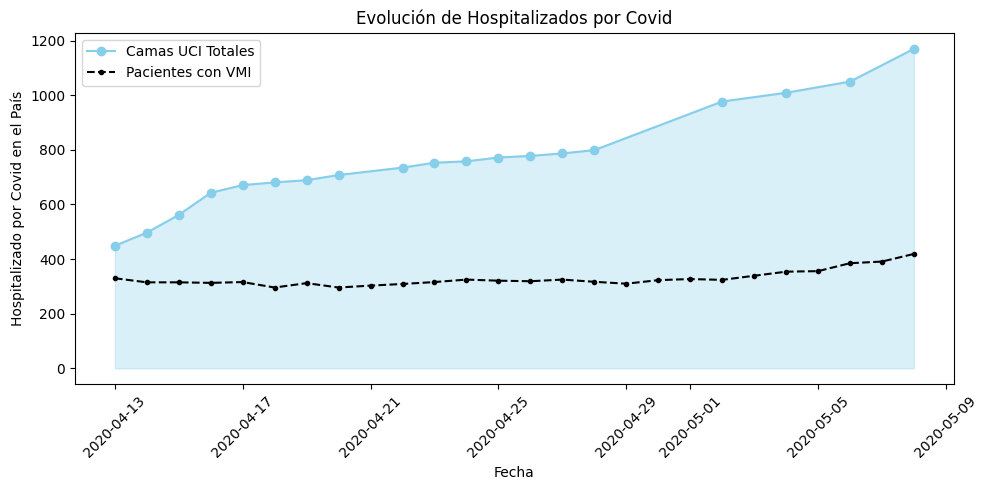

In [24]:
# Dibujamos el gráfico de líneas
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_total.Fecha, df_total['Hospitalizados Totales'], marker='o', linestyle='-', color='skyblue', label='Camas UCI Totales')
ax.plot(df_filtered.Fecha, df_filtered['Pacientes VMI'], marker='.', linestyle='--', color='black', label='Pacientes con VMI')

# Rellenamos el área bajo la curva
ax.fill_between(df_total.Fecha, df_total['Hospitalizados Totales'], color='skyblue', alpha=0.3)

# Etiquetas y título
plt.title('Evolución de Hospitalizados por Covid')
plt.xlabel('Fecha')
plt.ylabel('Hospitalizado por Covid en el País')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar la figura

# Mostramos el gráfico resultante
plt.show()


# Gráfico de Barras Apilados con Etiquetas

In [25]:
path = '/content/drive/MyDrive/udd/cursos/visualizacion/clases_practicas/data/afiliados_partidos_politicos.csv'
df = pd.read_csv(path)
df.head()

,Partido,Mujeres,Hombres
0,CIUDADANOS,10712,8612
1,COMUNISTA DE CHILE,39748,44754
2,CONVERGENCIA SOCIAL,2076,1981
3,DEMOCRATA CRISTIANO,51803,55809
4,ECOLOGISTA VERDE,8771,7641


Calculamos los porcentajes

In [26]:
# Convertir los nombres de los partidos a formato de título (primera letra en mayúscula)
df['Partido'] = df['Partido'].str.title()

# Calcular el total de inscritos (mujeres + hombres) para cada partido
df['Total'] = df['Mujeres'] + df['Hombres']

# Calcular el porcentaje de mujeres inscritas en cada partido
df['Mujeres (%)'] = df['Mujeres'] / df['Total'] * 100

# Calcular el porcentaje de hombres inscritos en cada partido
df['Hombres (%)'] = df['Hombres'] / df['Total'] * 100

# Establecer la columna 'Partido' como índice del DataFrame
df.set_index('Partido', inplace=True)

# Mostrar las primeras filas del DataFrame modificado
df.head()


,Mujeres,Hombres,Total,Mujeres (%),Hombres (%)
Partido,,,,,
Ciudadanos,10712,8612,19324,55.433658,44.566342
Comunista De Chile,39748,44754,84502,47.037940,52.962060
Convergencia Social,2076,1981,4057,51.170816,48.829184
Democrata Cristiano,51803,55809,107612,48.138683,51.861317
Ecologista Verde,8771,7641,16412,53.442603,46.557397


Comenzamos por hacer un gráfico básico de barras

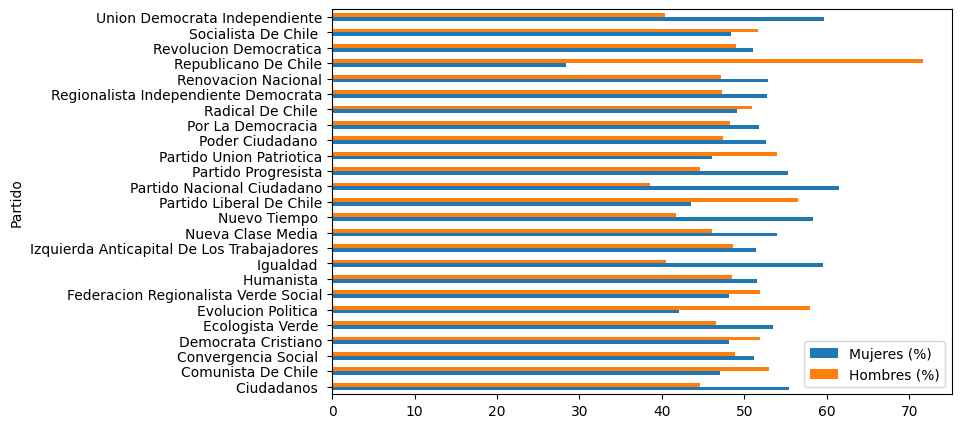

In [27]:

fig, ax = plt.subplots(figsize=(8, 5))
percents = ['Mujeres (%)', 'Hombres (%)']
ax = df[percents].plot(kind="barh", ax=ax)


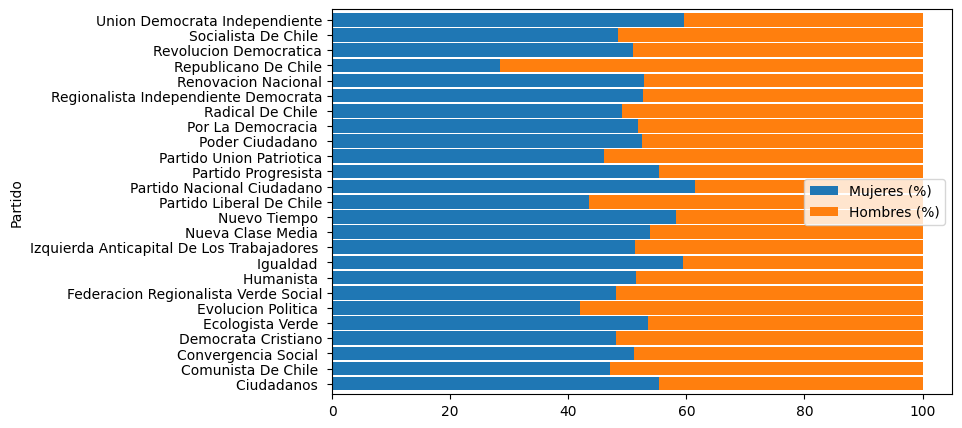

In [28]:
fig, ax = plt.subplots(figsize=(8, 5))
percents = ['Mujeres (%)', 'Hombres (%)']
ax = df[percents].plot(kind="barh", width=0.9, ax=ax,  stacked=True)

Para que se vea mejor, ordenaremos los datos en base al porcentaje de mujeres inscritas en cada partido. Ahora ya estamos haciendo elecciones conscientes de qué y cómo visualizar nuestros datos para comunicar un mensaje.


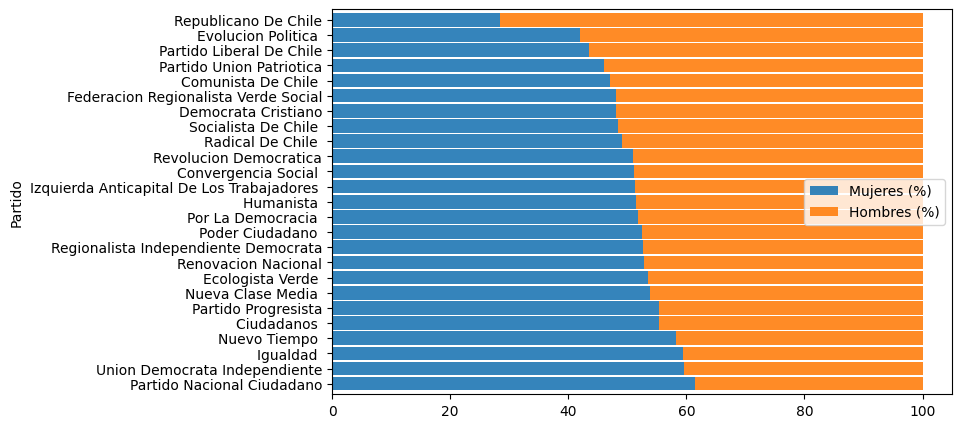

In [29]:
df_sorted = df[percents].sort_values(by='Mujeres (%)', ascending=False)
fig, ax = plt.subplots(figsize=(8, 5))
percents = ['Mujeres (%)', 'Hombres (%)']
ax = df_sorted[percents].plot(kind="barh", width=0.9, ax=ax,  stacked=True, alpha=0.9)


[]

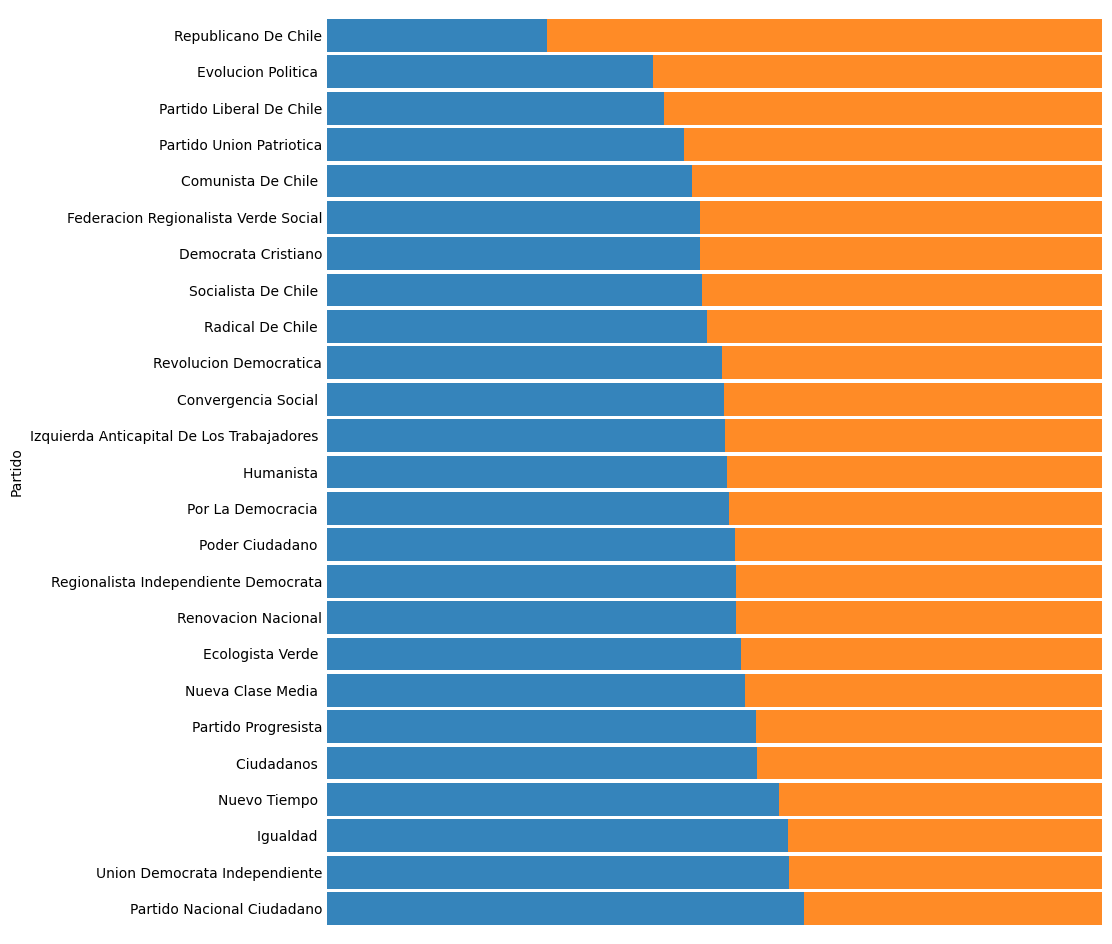

In [30]:
# Definir las columnas que representan los porcentajes de mujeres y hombres
percents = ['Mujeres (%)', 'Hombres (%)']

# Ordenar el DataFrame 'df' de forma descendente según el porcentaje de mujeres
df_sorted = df[percents].sort_values(by='Mujeres (%)', ascending=False)

# Crear una figura y un eje para el gráfico con un tamaño específico
fig, ax = plt.subplots(figsize=(10, 12))

# Generar el gráfico de barras horizontal apilado
ax = df_sorted[percents].plot(kind="barh",  # Tipo de gráfico: barras horizontales
                              width=0.9,     # Ancho de las barras
                              ax=ax,         # Eje sobre el que se dibuja el gráfico
                              stacked=True,  # Barras apiladas
                              alpha=0.9,     # Transparencia de las barras
                              legend=False,  # Sin leyenda
                              xlim=(0,100))  # Límites del eje x

# Ocultar los bordes del gráfico
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Eliminar las marcas de graduación de los ejes
ax.tick_params(axis='both', which='both', length=0)

# Eliminar las etiquetas del eje x
ax.xaxis.set_ticks([])


Borramos el nombre del eje y que no ayuda mucho, pero agregamos esa información en el título del gráfico para que no se pierda.

Text(0.5, 1.0, 'Porcentaje de personas inscritas en partidos políticos por sexo')

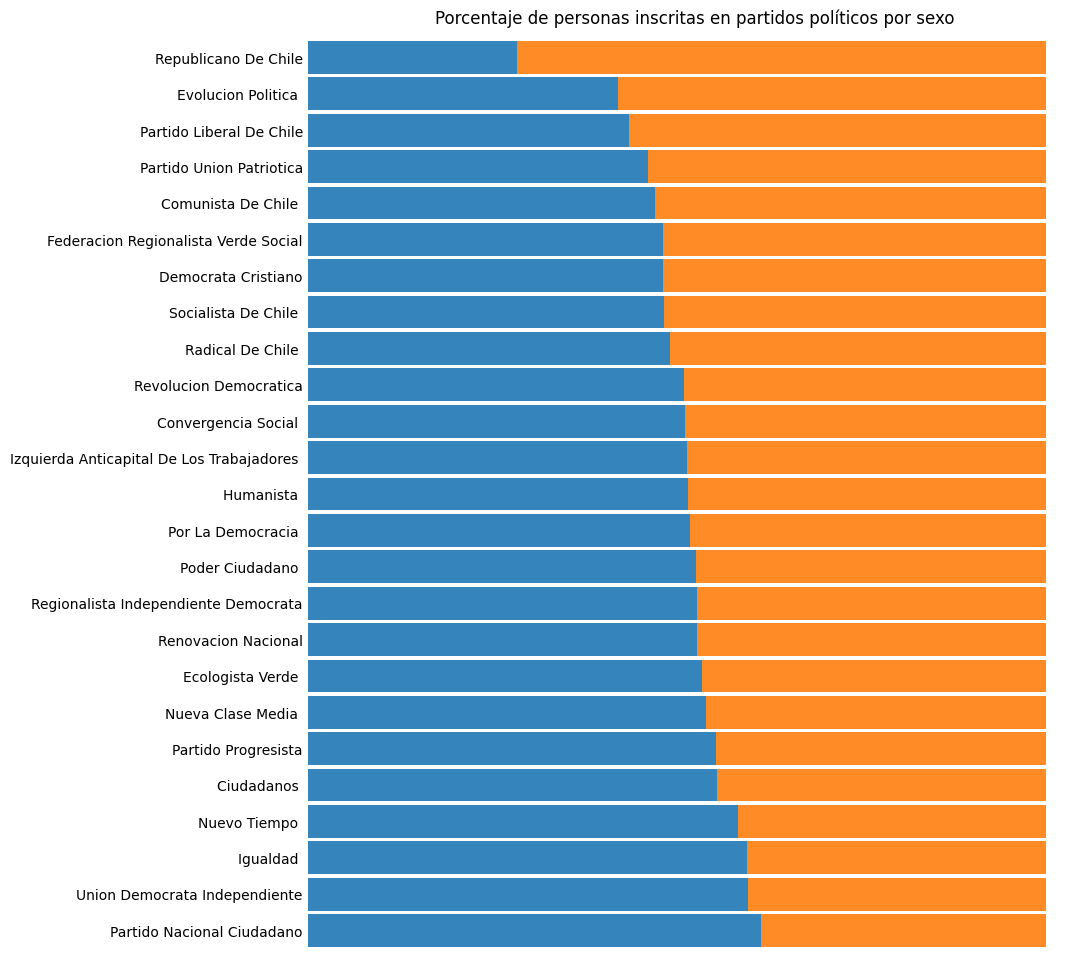

In [31]:
# Definir las columnas que representan los porcentajes de mujeres y hombres
percents = ['Mujeres (%)', 'Hombres (%)']

# Ordenar el DataFrame 'df' de forma descendente según el porcentaje de mujeres
df_sorted = df[percents].sort_values(by='Mujeres (%)', ascending=False)

# Crear una figura y un eje para el gráfico con un tamaño específico
fig, ax = plt.subplots(figsize=(10, 12))

# Generar el gráfico de barras horizontal apilado
ax = df_sorted[percents].plot(kind="barh",  # Tipo de gráfico: barras horizontales
                              width=0.9,     # Ancho de las barras
                              ax=ax,         # Eje sobre el que se dibuja el gráfico
                              stacked=True,  # Barras apiladas
                              alpha=0.9,     # Transparencia de las barras
                              legend=False)  # Sin leyenda

# Ocultar los bordes del gráfico
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Eliminar las marcas de graduación de los ejes
ax.tick_params(axis='both', which='both', length=0)

# Eliminar las etiquetas del eje x
ax.xaxis.set_ticks([])

# Eliminar la etiqueta del eje y
ax.set_ylabel("")

# Establecer el título del gráfico
ax.set_title("Porcentaje de personas inscritas en partidos políticos por sexo")


Agregamos unos textos para indicar qué es lo que estamos gráficando. Esto viene a reemplazar la leyenda que ya borramos

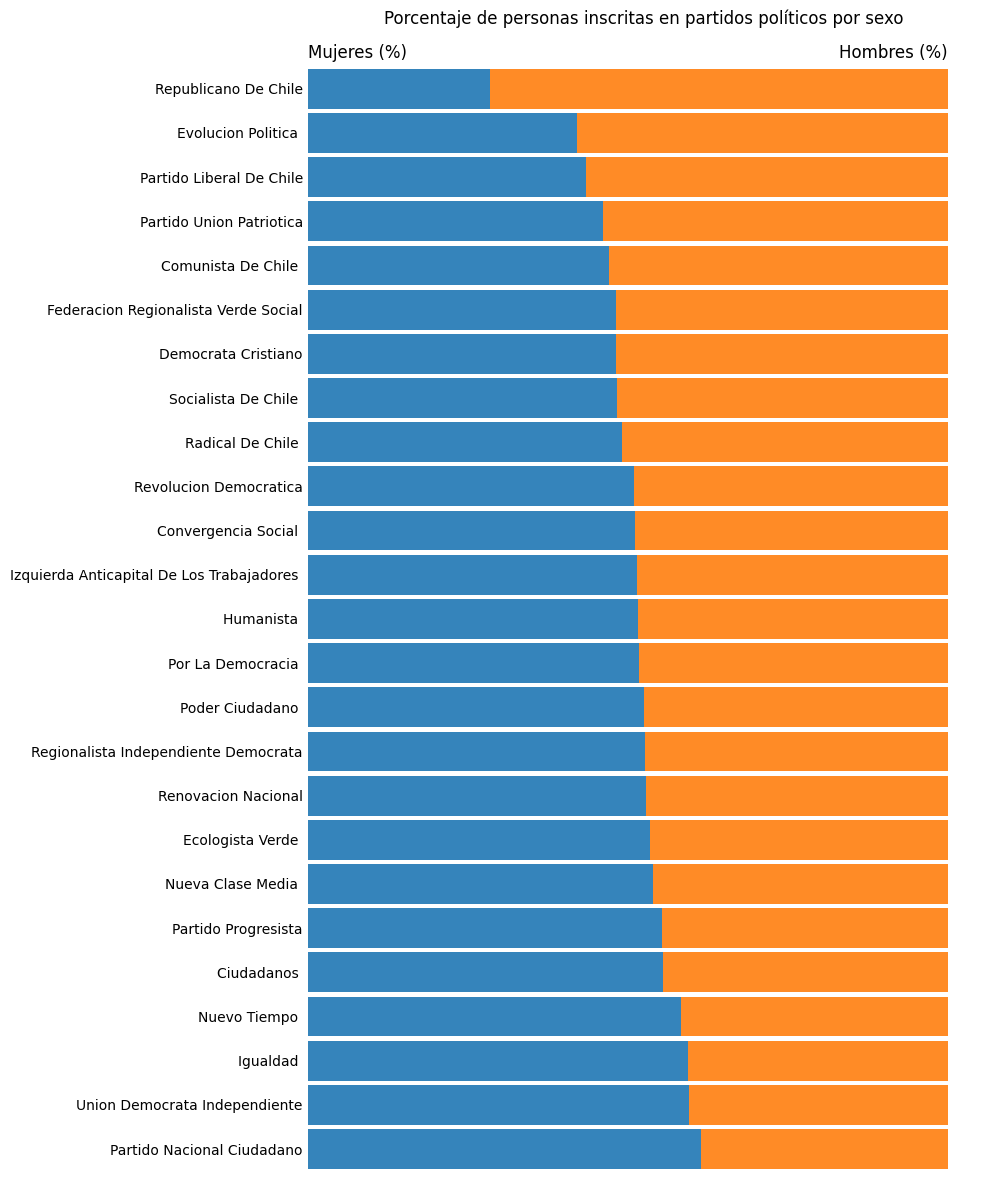

In [32]:
# Definir las columnas que representan los porcentajes de mujeres y hombres
percents = ['Mujeres (%)', 'Hombres (%)']

# Ordenar el DataFrame 'df' de forma descendente según el porcentaje de mujeres
df_sorted = df[percents].sort_values(by='Mujeres (%)', ascending=False)

# Crear una figura y un eje para el gráfico con un tamaño específico
fig, ax = plt.subplots(figsize=(10, 12))

# Generar el gráfico de barras horizontal apilado
ax = df_sorted[percents].plot(kind="barh",  # Tipo de gráfico: barras horizontales
                              width=0.9,     # Ancho de las barras
                              ax=ax,         # Eje sobre el que se dibuja el gráfico
                              stacked=True,  # Barras apiladas
                              alpha=0.9,     # Transparencia de las barras
                              legend=False)  # Sin leyenda

# Ocultar los bordes del gráfico
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Eliminar las marcas de graduación de los ejes
ax.tick_params(axis='both', which='both', length=0)

# Agregar etiquetas de texto para los porcentajes de mujeres y hombres
ax.text(0, df_sorted.shape[0]-0.3, percents[0], fontsize=12)
ax.text(83, df_sorted.shape[0]-0.3, percents[1], fontsize=12)

# Eliminar las etiquetas del eje x
ax.xaxis.set_ticks([])

# Establecer el título del gráfico y eliminar la etiqueta del eje y
ax.set_ylabel("")
ax.set_title("Porcentaje de personas inscritas en partidos políticos por sexo", pad=24)

# Ajustar automáticamente el diseño del gráfico
plt.tight_layout()


De momento hemos ocupado los colores que matplotlib usa por defecto, pero ¿cuál es el problema con eso? Es mejor hacer una elección consciene de qué color ocuparemos y para qué, de esta forma también nos permite hacer conexiones entre, por ejemplo, las barras y la leyenda.

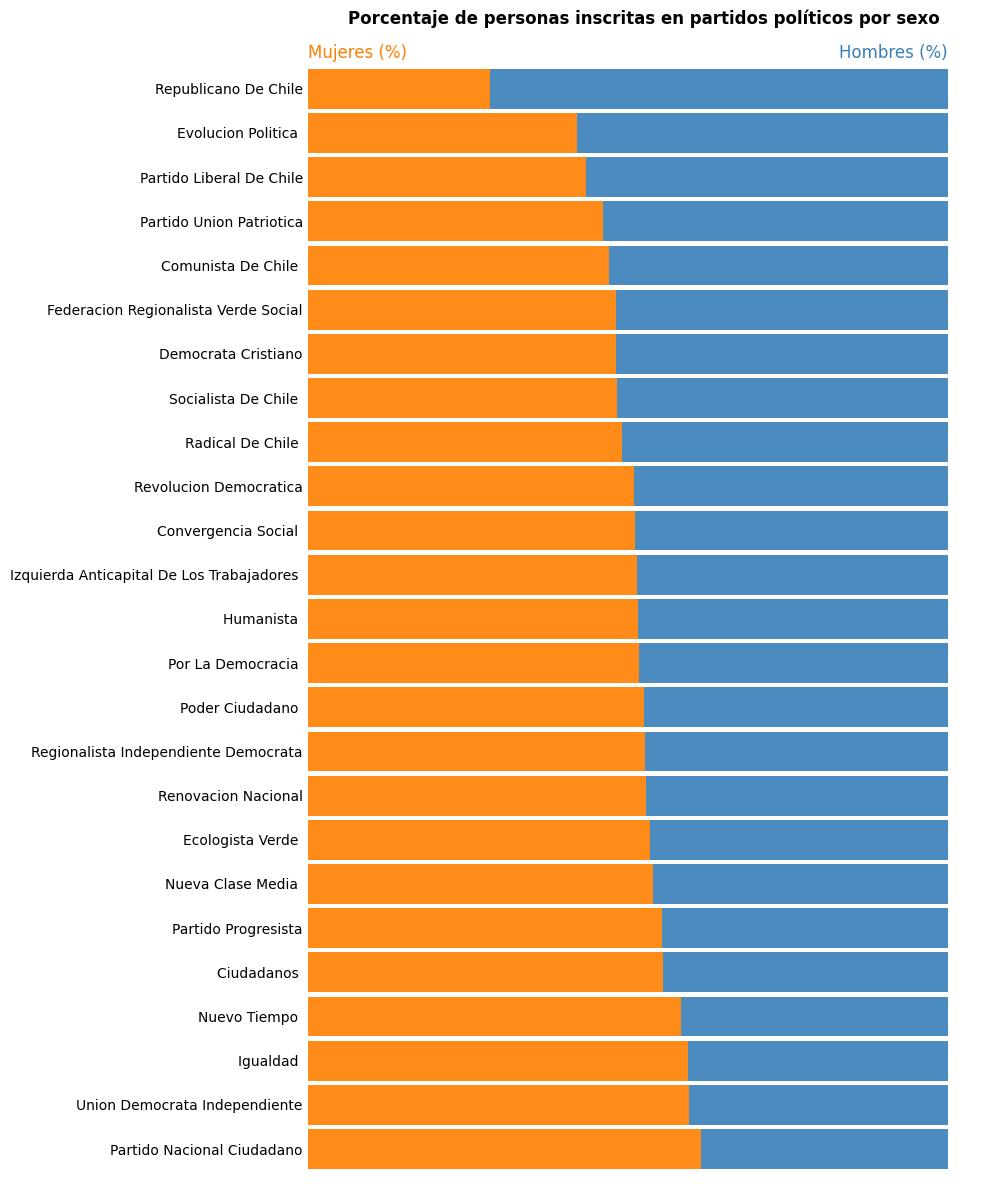

In [33]:
# Definir las columnas que representan los porcentajes de mujeres y hombres
percents = ['Mujeres (%)', 'Hombres (%)']

# Ordenar el DataFrame 'df' de forma descendente según el porcentaje de mujeres
df_sorted = df[percents].sort_values(by='Mujeres (%)', ascending=False)

# Crear una figura y un eje para el gráfico con un tamaño específico
fig, ax = plt.subplots(figsize=(10, 12))

# Definir los colores para las barras de mujeres y hombres
colors = ['#ff7f00', '#377eb8']

# Generar el gráfico de barras horizontal apilado
ax = df_sorted[percents].plot(kind="barh",      # Tipo de gráfico: barras horizontales
                              width=0.9,        # Ancho de las barras
                              ax=ax,            # Eje sobre el que se dibuja el gráfico
                              stacked=True,     # Barras apiladas
                              alpha=0.9,        # Transparencia de las barras
                              legend=False,     # Sin leyenda
                              color=colors)     # Colores de las barras

# Ocultar los bordes del gráfico
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Eliminar las marcas de graduación de los ejes
ax.tick_params(axis='both', which='both', length=0)

# Agregar etiquetas de texto para los porcentajes de mujeres y hombres con colores correspondientes
ax.text(0, df_sorted.shape[0]-0.3, percents[0], fontsize=12, color=colors[0])
ax.text(83, df_sorted.shape[0]-0.3, percents[1], fontsize=12, color=colors[1])

# Eliminar las etiquetas del eje x
ax.xaxis.set_ticks([])

# Establecer el título del gráfico y eliminar la etiqueta del eje y
ax.set_ylabel("")
ax.set_title("Porcentaje de personas inscritas en partidos políticos por sexo", pad=24, fontweight=550)

# Ajustar automáticamente el diseño del gráfico
plt.tight_layout()


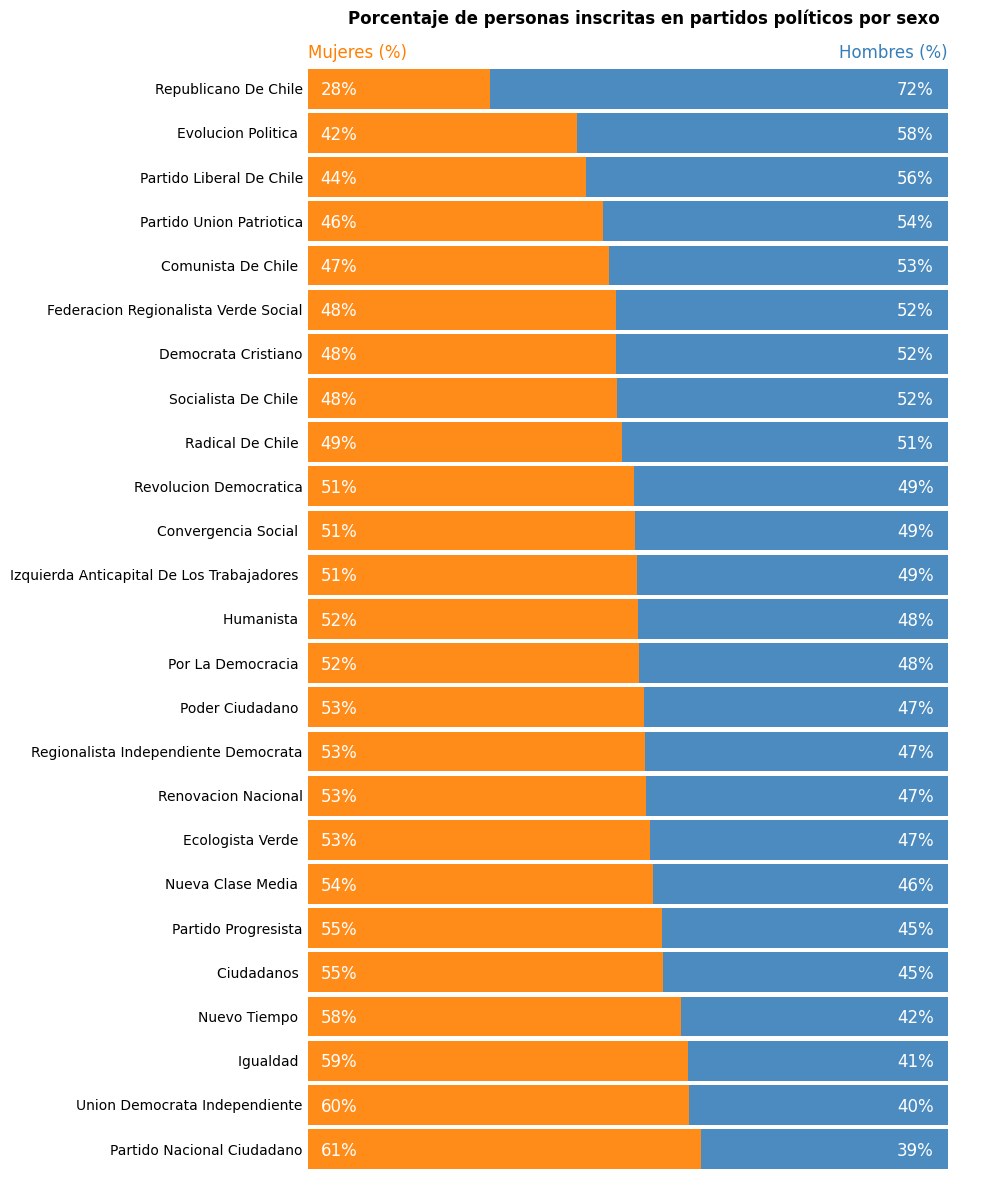

In [34]:
# Definir las columnas que representan los porcentajes de mujeres y hombres
percents = ['Mujeres (%)', 'Hombres (%)']

# Ordenar el DataFrame 'df' de forma descendente según el porcentaje de mujeres
df_sorted = df[percents].sort_values(by='Mujeres (%)', ascending=False)

# Crear una figura y un eje para el gráfico con un tamaño específico
fig, ax = plt.subplots(figsize=(10, 12))

# Definir los colores para las barras de mujeres y hombres
colors = ['#ff7f00', '#377eb8']

# Generar el gráfico de barras horizontal apilado
ax = df_sorted[percents].plot(kind="barh",      # Tipo de gráfico: barras horizontales
                              width=0.9,        # Ancho de las barras
                              ax=ax,            # Eje sobre el que se dibuja el gráfico
                              stacked=True,     # Barras apiladas
                              alpha=0.9,        # Transparencia de las barras
                              legend=False,     # Sin leyenda
                              color=colors)     # Colores de las barras

# Ocultar los bordes del gráfico
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Eliminar las marcas de graduación de los ejes
ax.tick_params(axis='both', which='both', length=0)

# Agregar etiquetas de texto para los porcentajes de mujeres y hombres con colores correspondientes
ax.text(0, df_sorted.shape[0]-0.3, percents[0], fontsize=12, color=colors[0])
ax.text(83, df_sorted.shape[0]-0.3, percents[1], fontsize=12, color=colors[1])

# Eliminar las etiquetas del eje x
ax.xaxis.set_ticks([])

# Iterar sobre cada barra en el gráfico de barras
for p in ax.patches:
    # Comprobar si la barra corresponde a la categoría 'Mujeres (%)'
    if p.xy[0] == 0:
        xpos = 2  # Establecer la posición en x para la anotación cerca del principio de la barra
    else:
        xpos = 92  # Establecer la posición en x para la anotación cerca del final de la barra

    # Añadir la anotación de texto con el porcentaje correspondiente
    ax.annotate(str(int(round(p.get_width()))) + "%",  # Texto de la anotación (porcentaje)
                (xpos, p.xy[1]+0.3),                   # Posición de la anotación
                color='white',                         # Color del texto
                fontsize=12)                           # Tamaño de la fuente

# Establecer el título del gráfico y eliminar la etiqueta del eje y
ax.set_ylabel("")
ax.set_title("Porcentaje de personas inscritas en partidos políticos por sexo", pad=24, fontweight=550)

# Ajustar automáticamente el diseño del gráfico
plt.tight_layout()
